## Week 8 Assignment: High Frequency Words  
DATA620 - Web Analytics  
  
Tom Detzel

### Introduction

The Tao Te Ching is a renowned book of wisdom and spirtuality purportedly written by the Chinese philosopher-sage Lao Tzu in the 4th Century B.C. Taoism is the philosophy of an unnamed, unknowable and eternal source of being and wisdom, the Tao. It's theory of yang and yin, (heaven and earth, man and woman, fire and water, etc.) influenced Asian religions for centuries, inspiring Confucianism, Buddism and other religions. The Tao Te Ching is a short, poetic work of about 10,000 words. Half that total is comprised of only 42 words. The book is heavy with metaphor and allegory and uses simple language to reveal deep meaning. The English translation analyzed here is from the Guttenberg collection.

This analysis found that the most common words were prepositions, pronouns and other stop words. When removed, the most frequent words are nouns, led by 'Tao'. Given the author's intent to use simple language structured in poetic fashion, the word distribution departs significantly from Zipf's Law. Collocations, concordances and bigrams resonate with spiritual and philosophical terms evoking human potential and growth.  

### 1. Get the Tao Te Ching Corpus
The book is available in raw text at the Guttenberg site. The code below downloads the book, trims off copyright and other unneeded matter and tokenizes the remaining content.

#### 1.1 First 75 characters

In [314]:
url = 'http://www.gutenberg.org/cache/epub/216/pg216.txt'
response = urllib2.urlopen(url)
raw = response.read().decode('utf_8')
# type(raw)
# len(raw)
raw[:75]

u'\ufeffThe Project Gutenberg EBook of Tao Teh King, by Lao-Tze\r\n\r\nThis eBook is f'

#### 1.2 Find start, end of the actual text

In [316]:
## marks end of book and start of copyright guff, so we will elminate from here down
raw.find('PART 1.'), raw.find('End of the Project Gutenberg EBook of Tao Teh King, by Lao-Tze')

(675, 61121)

#### 1.3 Length of text in characters

In [318]:
raw = raw[675:61120]
len(raw)

60445

#### 1.4 Length of text in tokens

In [321]:
tokens = word_tokenize(raw)
len(tokens)

12972

### 2. Find the 200 Most Common Words
By normalizing the tokens to lower case and eliminating non-alpha characters, we can get a sorted list of the most common words. In this case, articles and prepositions top the list, with the exception of 'tao' – the only proper noun in the top 20 words.

In [323]:
## filtering only on alpha tokens and converting to lower case
fdist = nltk.FreqDist(w.lower() for w in tokens if w.isalpha())
fdist.most_common()[:199]

[(u'the', 699),
 (u'and', 369),
 (u'of', 366),
 (u'to', 344),
 (u'is', 299),
 (u'it', 234),
 (u'not', 178),
 (u'in', 173),
 (u'he', 147),
 (u'a', 133),
 (u'that', 132),
 (u'be', 126),
 (u'his', 115),
 (u'who', 105),
 (u'all', 97),
 (u'tao', 84),
 (u'them', 83),
 (u'its', 83),
 (u'are', 79),
 (u'their', 79),
 (u'they', 70),
 (u'from', 70),
 (u'with', 69),
 (u'no', 66),
 (u'what', 64),
 (u'as', 62),
 (u'things', 56),
 (u'which', 54),
 (u'i', 54),
 (u'does', 54),
 (u'do', 53),
 (u'when', 53),
 (u'will', 52),
 (u'one', 51),
 (u'this', 50),
 (u'by', 48),
 (u'has', 47),
 (u'there', 47),
 (u'on', 46),
 (u'we', 46),
 (u'but', 45),
 (u'men', 43),
 (u'so', 43),
 (u'him', 43),
 (u'great', 42),
 (u'therefore', 40),
 (u'can', 39),
 (u'have', 39),
 (u'for', 38),
 (u'heaven', 38),
 (u'would', 36),
 (u'those', 36),
 (u'thus', 33),
 (u'if', 32),
 (u'people', 32),
 (u'without', 32),
 (u'sage', 31),
 (u'know', 31),
 (u'yet', 28),
 (u'state', 28),
 (u'or', 26),
 (u'way', 24),
 (u'may', 23),
 (u'were', 23)

### 3. Compute Total and Unique Word Counts

We define unique words as any nonnumeric token and any part of speech. Using this definition, there are only 1,875 unique words in the Tao corpus of 10,300 words (by our definition above).

It's a simple book.

#### 3.1 Unique Words

In [324]:
len(set(fdist))

1875

#### 3.2 Total  Words

In [325]:
np.sum([v  for (u,v) in fdist.most_common()]) 

10300

### 4. Number of Unique Words in Half the Corpus
We've shown that there are 1,875 unique words in the corpus and 10,300 total words. How many unique words make up half the total words in the Tao corpus? We calculate the cumulative sum from our frequency distribution and count the number of words where it reaches 5,150, the halfway total. Only 42 words make up half the corpus. 

In [326]:
tao_unique = set(fdist)
tao_cum = np.cumsum([v  for (u,v) in fdist.most_common()]) 

#### 4.1 Count of unique words that account for half the corpus

In [327]:
len(tao_cum[tao_cum < 5150])

42

#### 4.1 Count of times they appear

In [328]:
tao_cum[42]

5168

### 5. Relative Frequency Distribution of Top 200 Words


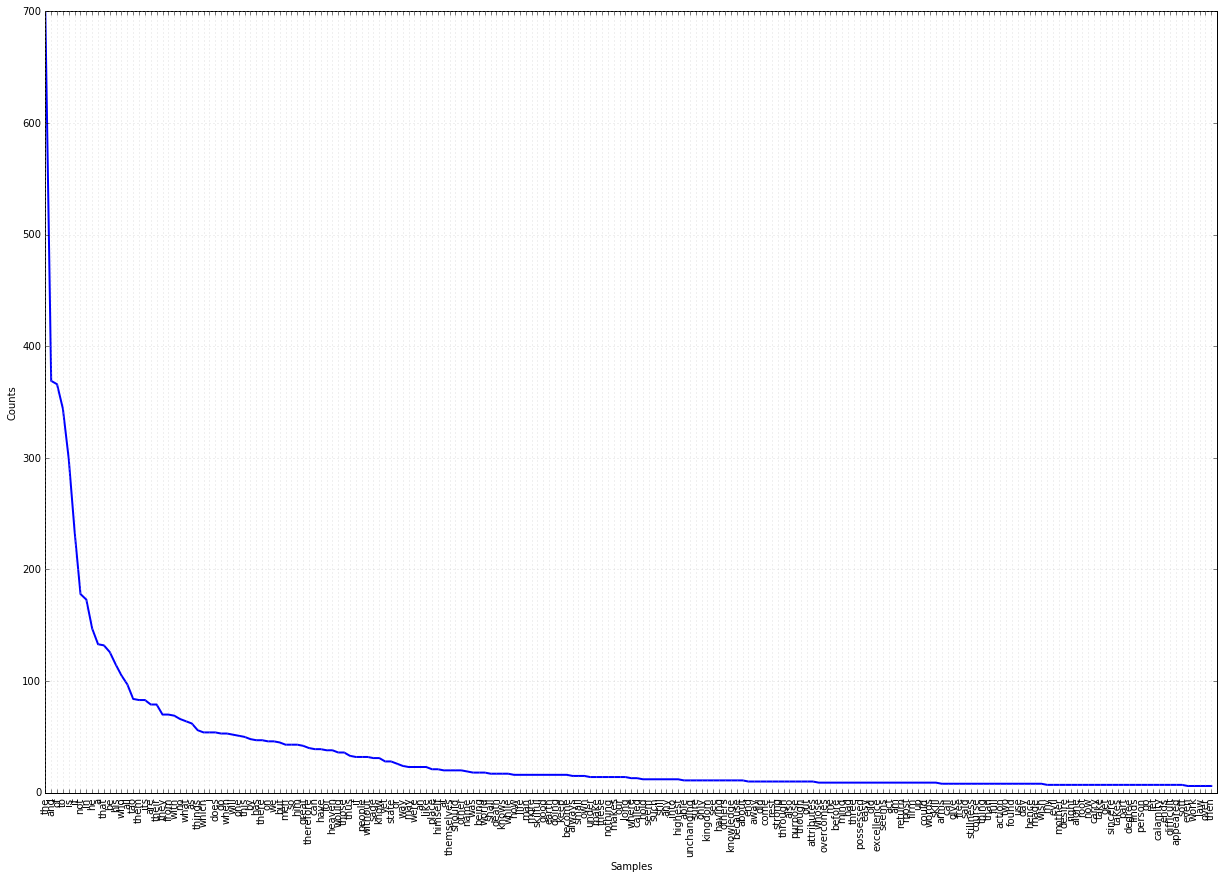

In [329]:
fdist.plot(200,cumulative=False)

### 6. Excluding stopwords
It's interesting to examine what happens when common stopwords are removed from the Tao. There are 1,763 unique words left, but they appear far less frequently. The most common, 'Tao', appears only 84 times. Most words in this list appear fewer than 10 times in the book.


In [330]:
tao = [w.lower() for w in tokens if w.isalpha()]
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
tao_stop = [w for w in tao if w not in stopwords]

In [331]:
tao_fdist = nltk.FreqDist(tao_stop)

#### 6.1 Count of unique non-stopwords

In [332]:
len(set(tao_fdist))

1763

#### 6.2  10 most common non-stopwords

In [333]:
tao_fdist.most_common()[:9]

[(u'tao', 84),
 (u'things', 56),
 (u'one', 51),
 (u'men', 43),
 (u'great', 42),
 (u'therefore', 40),
 (u'heaven', 38),
 (u'would', 36),
 (u'thus', 33)]

#### 6.3 Frequency distribution, non-stopwords

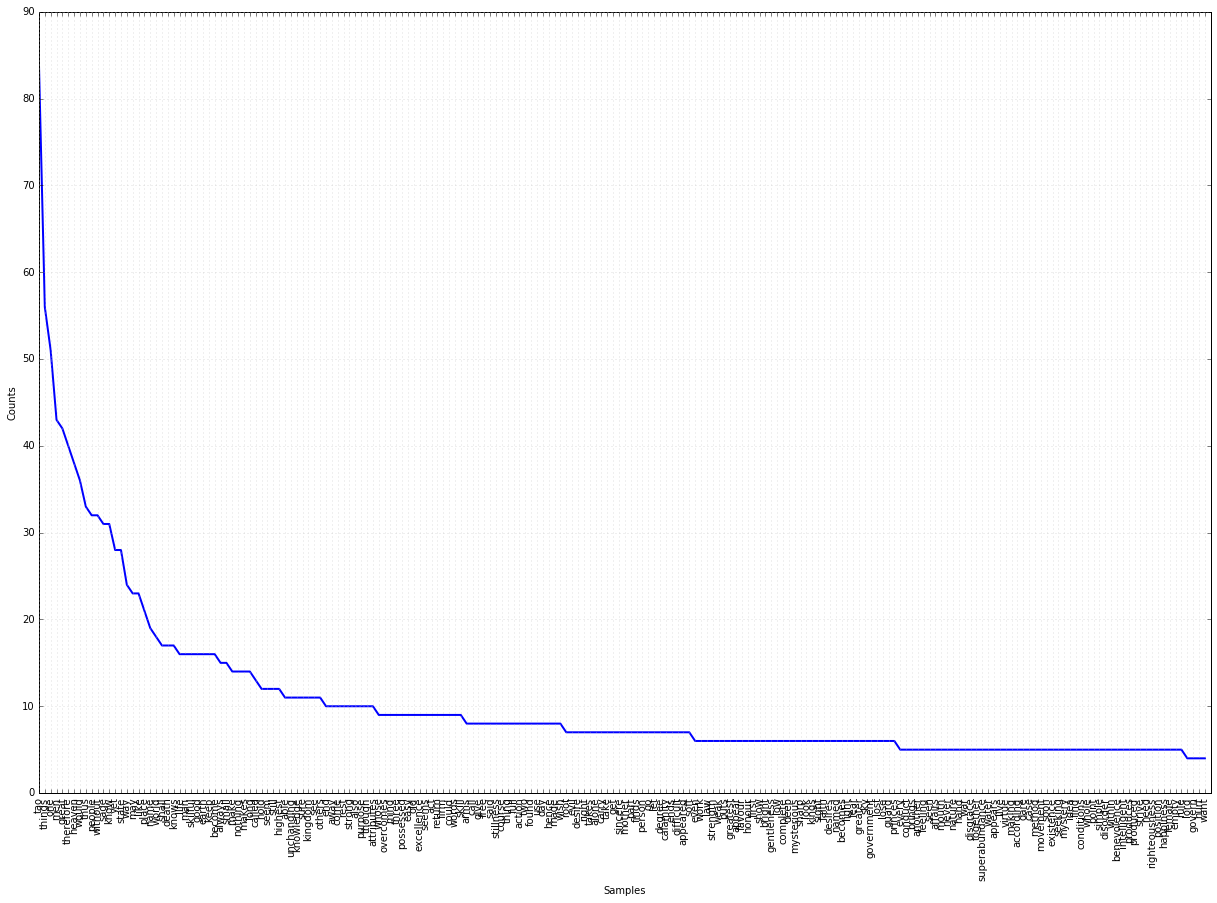

In [334]:
tao_fdist.plot(200,cumulative=False)

### 7. Tagging words by POS in the Tao Te Ching
The 10 most common parts of speech (non-stopwords) are nounds, followed by adectives, plural nouns, adverbs and 3rd-person verb forms and other verbs. 

In [335]:
tao_tagged = nltk.pos_tag(tao_stop)

In [336]:
tag_fd = nltk.FreqDist(tag for (word, tag) in tao_tagged)
tag_fd.most_common()[:9]

[('NN', 1335),
 ('JJ', 886),
 ('NNS', 563),
 ('RB', 330),
 ('VBP', 257),
 ('VBZ', 182),
 ('VBG', 177),
 ('VBD', 160),
 ('VB', 150)]

### 8. Zipf's Law and the Tao corpus

Acccording to Zipf's law, the frequency of a word in natural speech is inversely proportional to its rank in the frequency table of all words in the corpus. In other words, the most frequent word will be twice as prevalent as the second most frequent and three times as common as the third, continuing along the frequency distribution.

In the Tao corpus, we find that the text is not a good fit. Log-log plots show the curve deviates strongly from the inverse diagonal predicted by Zipf's Law, whether stopwords are included or not.

In [350]:
def logplot_zipf(fdist):
   
    y = np.array([v for (u,v) in fdist.most_common()])
    t = rankdata(y, method='dense').astype(int)
    x = max(t)+1 - t
    
    plot.figure(figsize=(10,8))
    plot.title('Zipf\'s Plot of \'Tao Te Ching\'', fontsize=16)
    plot.ylabel('Word Frequency', fontsize=14)
    plot.xlabel('Rank in Frequency', fontsize=14)
    plot.grid(True)
    plot.loglog(x, y, "o")


#### 8.1 Zipf's plot, all alpha tokens

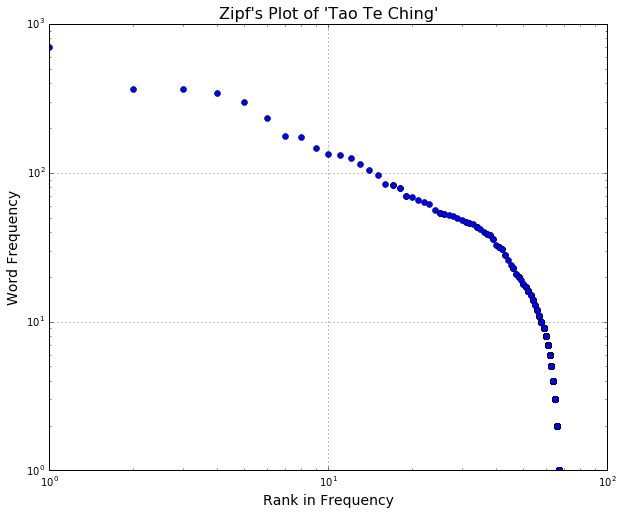

In [351]:
logplot_zipf(fdist)

#### 8.2 Zipf's plot excluding stopwords

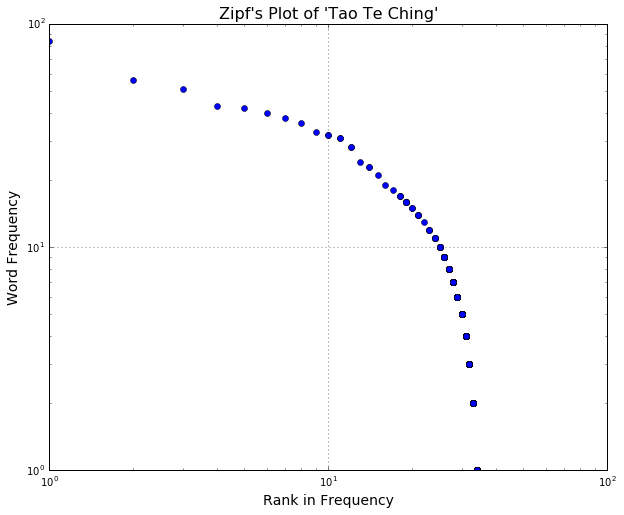

In [352]:
logplot_zipf(tao_fdist)

#### 8.3 Adding words to the Zipf plot

In [353]:
# A different Zipf plot putting words on the plot

def new_Zipf(word_list):
    try:
        tokens_with_count = Counter(word_list)
        counts = np.array(tokens_with_count.values())
        tokens = tokens_with_count.keys()

        ranks = np.arange(1, len(counts)+1)
        indices = np.argsort(-counts)
        frequencies = counts[indices]
        plot.figure(figsize=(10,8))
        plot.loglog(ranks, frequencies, marker=".")
        plot.title("Zipf plot for Tao corpus tokens", fontsize=20)
        plot.xlabel("Frequency rank of token", fontsize=12)
        plot.ylabel("Absolute frequency of token", fontsize=12)
        plot.grid(True)

        for n in list(np.logspace(-0.5, np.log10(len(counts)), 20).astype(int)):
            dummy = plot.text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                         verticalalignment="bottom",
                         horizontalalignment="left",
                         fontsize=12)
    except Exception as e:
        pass

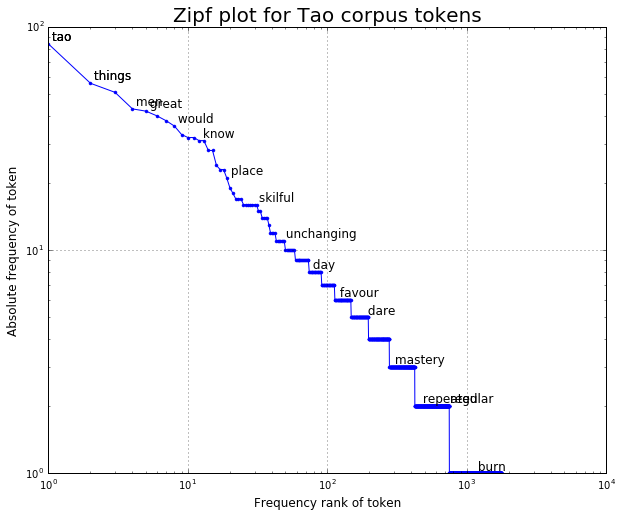

In [354]:
new_Zipf(tao_stop)

### 8. Collocations, Concordance, Bigrams
Collocations containing words like "heaven", "sage", "highest", "happiness", "kings" and "utmost" – along with "rivers", "seas" and "grass" suggest philosophical and religious themes that span the yin-yang philosphy of Taoism. Bigrams reinforce descriptions of the Tao as "enduring" and "unchanging", i.e., manifesting as eternal.

In [361]:
tao_text = nltk.Text(tao_stop)

#### 8.1 Collocations

In [360]:
tao_text.collocations()

heaven earth; therefore sage; possessed highest; princes kings;
happiness attaining; utmost degree; alone seem; left hand; beneath
sky; work done; conduct affairs; capacity forbearance; crafty
dexterity; extensively learned; fullest measure; grass dealt; points
unravel; portals nostrils; repeated accumulation; rivers seas


#### 8.2 Concordance

In [357]:
tao_text.concordance('tao', lines=20)

Displaying 20 of 84 matches:
                                      tao trodden enduring unchanging tao name 
                                      tao name named enduring unchanging name c
bstinence action good order universal tao like emptiness vessel employment must
agreement obscurity others pure still tao would ever continue know whose son mi
 low place men dislike hence way near tao excellence residence suitability plac
ry direction appear without knowledge tao produces things nourishes produces cl
yet control called mysterious quality tao thirty spokes unite one nave empty sp
et see front follow see back lay hold tao old direct things present day able kn
w old beginning called unwinding clue tao skilful masters tao old times subtle 
ed unwinding clue tao skilful masters tao old times subtle exquisite penetratio
 rest gradually arise preserve method tao wish full full afford seem worn appea
racter goes likeness heaven possesses tao possessed tao endures long end bodily
keness heav

#### 8.3 Bigrams

In [358]:
list(nltk.bigrams(tao_text))[0:10]

[(u'part', u'ch'),
 (u'ch', u'tao'),
 (u'tao', u'trodden'),
 (u'trodden', u'enduring'),
 (u'enduring', u'unchanging'),
 (u'unchanging', u'tao'),
 (u'tao', u'name'),
 (u'name', u'named'),
 (u'named', u'enduring'),
 (u'enduring', u'unchanging')]